<a href="https://colab.research.google.com/github/apurvapothumarthi/life-expectancy-analysis/blob/main/Life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#use raw link from github
url="https://raw.githubusercontent.com/apurvapothumarthi/life-expectancy-analysis/main/Life%20Expectancy%20Data.csv"
data=pd.read_csv(url)

In [ ]:
data.head()

In [ ]:
!pip install dataprep

In [ ]:
data.shape

In [ ]:
data.info()


In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
missing_value_count=data.isnull().sum()
missing_value_count

In [ ]:
from dataprep.eda import create_report
report = create_report(data, title='The Report')
report.show_browser()

In [ ]:
report

In [ ]:
#Plotting the Target class
plt.hist(data['Life expectancy '])  #note: life expectancy followed by space as column name
plt.show()

Multi-Collinearity Feature infant deaths and Feature under-five deaths  --> Correlation Score 0.9966288820398191
Multi-Collinearity Feature percentage expenditure and Feature GDP --> Correlation Score 0.8993726409895392
Multi-Collinearity Feature under-five deaths  and Feature infant deaths --> Correlation Score 0.9966288820398191
Multi-Collinearity Feature GDP and Feature percentage expenditure --> Correlation Score 0.8993726409895392
Multi-Collinearity Feature  thinness  1-19 years and Feature  thinness 5-9 years --> Correlation Score 0.9391019921914692
Multi-Collinearity Feature  thinness 5-9 years and Feature  thinness  1-19 years --> Correlation Score 0.9391019921914692
Multi-Collinearity Feature Income composition of resources and Feature Schooling --> Correlation Score 0.8000924203919645
Multi-Collinearity Feature Schooling and Feature Income composition of resources --> Correlation Score 0.8000924203919645


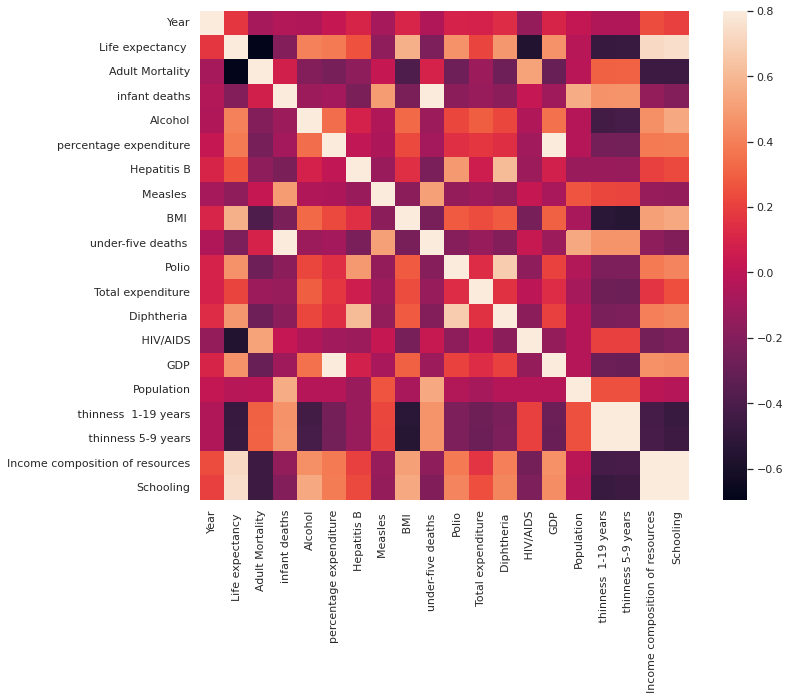

In [ ]:
#Check for Multicollinearity
#Multicollinearity is the occurrence of high intercorrelations among two or more independent variables.
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

for i in range(len(corrmat.columns)):
  for j in range(len(corrmat.index)):
    if corrmat.iloc[i,j]>0.80 and corrmat.iloc[i,j] != 1.0:
      print('Multi-Collinearity Feature {} and Feature {} --> Correlation Score {}'.format(corrmat.columns[i],corrmat.columns[j],corrmat.iloc[i,j]))

In [ ]:
#4 pairs of features have high correlation:
#1. infant_deaths and under-five_deaths
#2. percentage_expenditure and GDP
#3. thinness_1-19 years and thinness_5-9 years
#4. Income_composition_of_resources and Schooling

#Best Option to deal with multi-collinearity is to remove any one feature
data=data.drop(['infant deaths','GDP',' thinness 5-9 years'], axis=1)
data=data.drop(['Country','Status'], axis=1)

KeyError: ignored

In [ ]:
corrmat['Life expectancy ']

Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Measles                           -0.157586
 BMI                               0.567694
under-five deaths                 -0.222529
Polio                              0.465556
Total expenditure                  0.218086
Diphtheria                         0.479495
 HIV/AIDS                         -0.556556
GDP                                0.461455
Population                        -0.021538
 thinness  1-19 years             -0.477183
 thinness 5-9 years               -0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy , dtype: float64

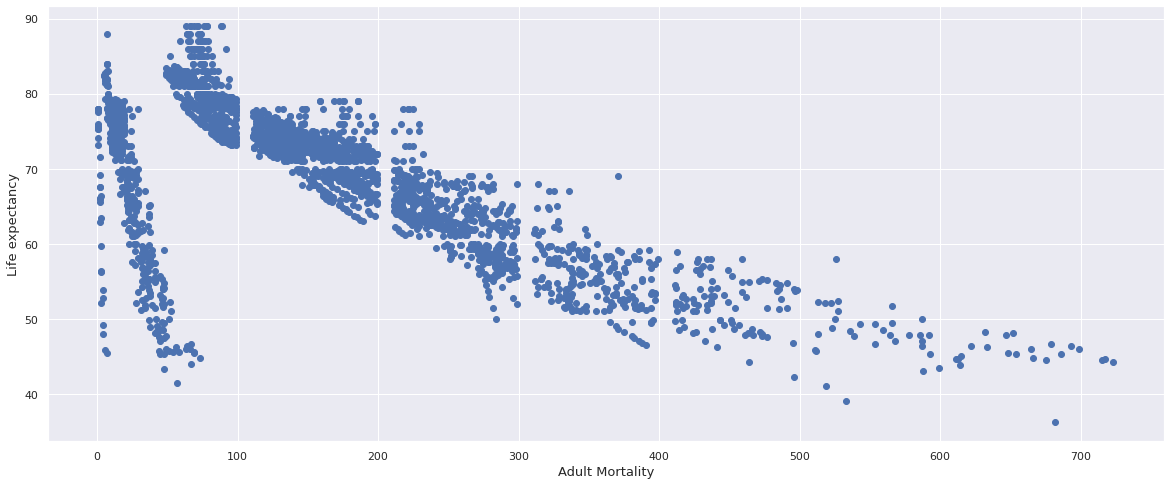

In [ ]:
#Removing Outliers
fig, ax = plt.subplots()
ax.scatter(x = data['Adult Mortality'], y = data['Life expectancy '])
plt.ylabel('Life expectancy', fontsize=13)
plt.xlabel('Adult Mortality', fontsize=13)
plt.show()

In [ ]:
data=data.drop(data[data['Adult Mortality']<70].index)

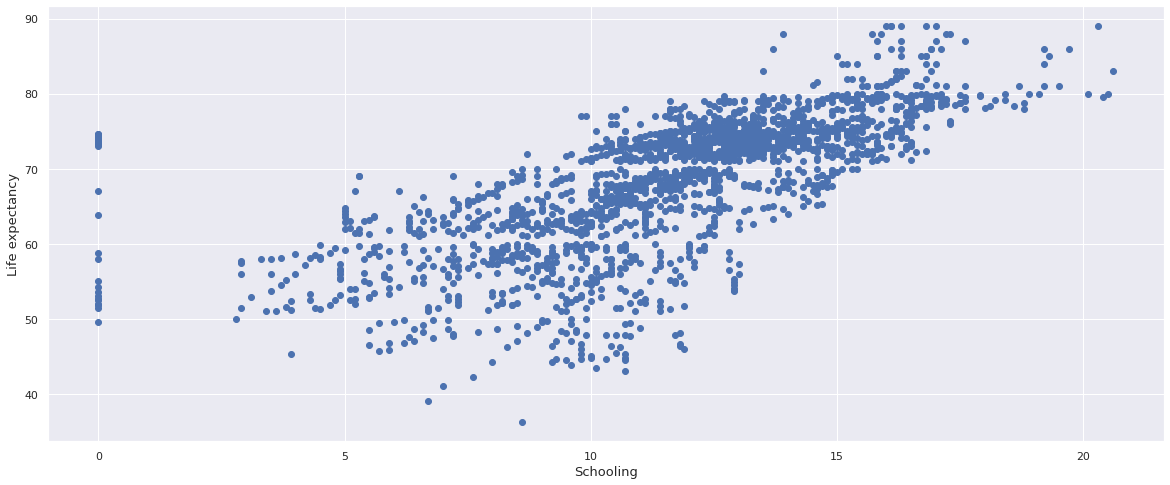

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['Schooling'], y = data['Life expectancy '])
plt.ylabel('Life expectancy', fontsize=13)
plt.xlabel('Schooling', fontsize=13)
plt.show()

In [ ]:
data = data.drop(data[data['Schooling']<2.5].index)

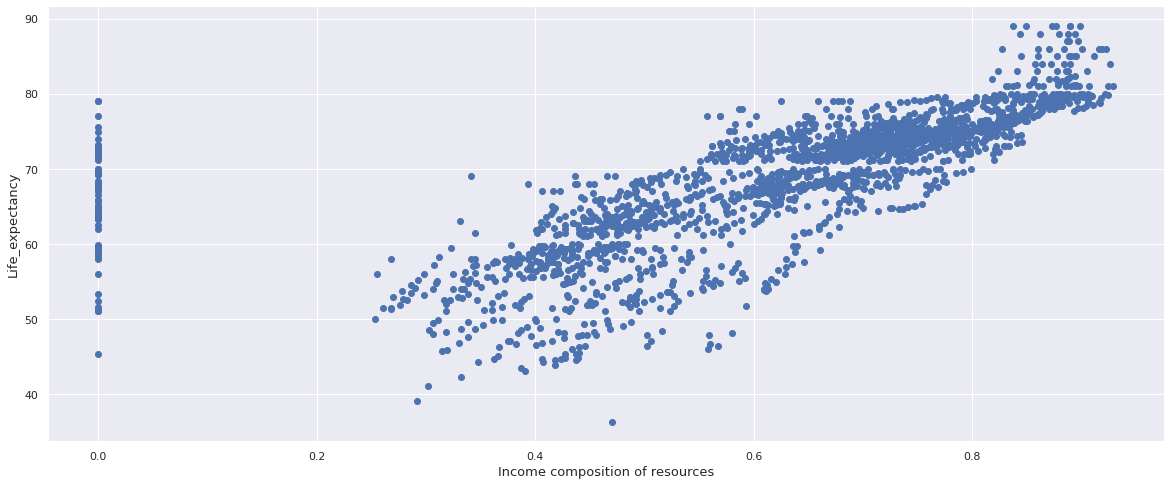

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['Income composition of resources'], y = data['Life expectancy '])
plt.ylabel('Life_expectancy', fontsize=13)
plt.xlabel('Income composition of resources', fontsize=13)
plt.show()

In [ ]:
data = data.drop(data[data['Income composition of resources']<0.1].index)

Missing values

In [ ]:
data=data.fillna(data.mean())   #status and country are the only categorical columns and they don't have any missing values. So we're using mean instead of median

In [ ]:
data.head()

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
y = data['Life expectancy ']  #only life expectancy
x = data.drop(['Life expectancy '],axis=1)   #except life expectancy rest of the columns

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
lr=LinearRegression()  #model

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
lr_conf=lr.score(xtest,ytest)

In [ ]:
print(lr_conf)

0.9341944934771962


In [ ]:
print(lr.coef_)

[ 5.24587626e-02 -6.13750021e-02  1.60388362e-01 -1.98815225e-05
 -1.66117301e-02 -1.18350104e-05  1.18562736e-02 -1.22917775e-03
  1.05791286e-02  7.14562065e-02  2.66392577e-02  1.31633353e-01
  1.72250751e-09 -4.29536603e-02  9.98754517e+00  1.43895626e-01]


In [ ]:
  xtrain.head()

,Year,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Schooling
1337,2008,119.0,0.61,535.278640,97.000000,2,6.1,4,98.0,8.78,97.0,0.1,6489822.0,3.8,0.739,13.6
2844,2013,135.0,0.01,447.545645,64.000000,0,51.7,0,65.0,3.92,64.0,0.1,253142.0,1.5,0.591,10.8
1088,2001,336.0,0.17,19.897909,80.792013,7408,16.9,58,52.0,3.65,5.0,3.0,8971139.0,1.1,0.322,5.1
1029,2012,76.0,8.20,2528.992935,98.000000,3,64.9,0,99.0,9.24,99.0,0.1,114511.0,0.8,0.858,16.8
1670,2012,154.0,0.01,915.185920,98.000000,0,31.8,0,98.0,4.76,98.0,0.1,1255882.0,7.1,0.756,14.3


Text(0, 0.5, 'Density')

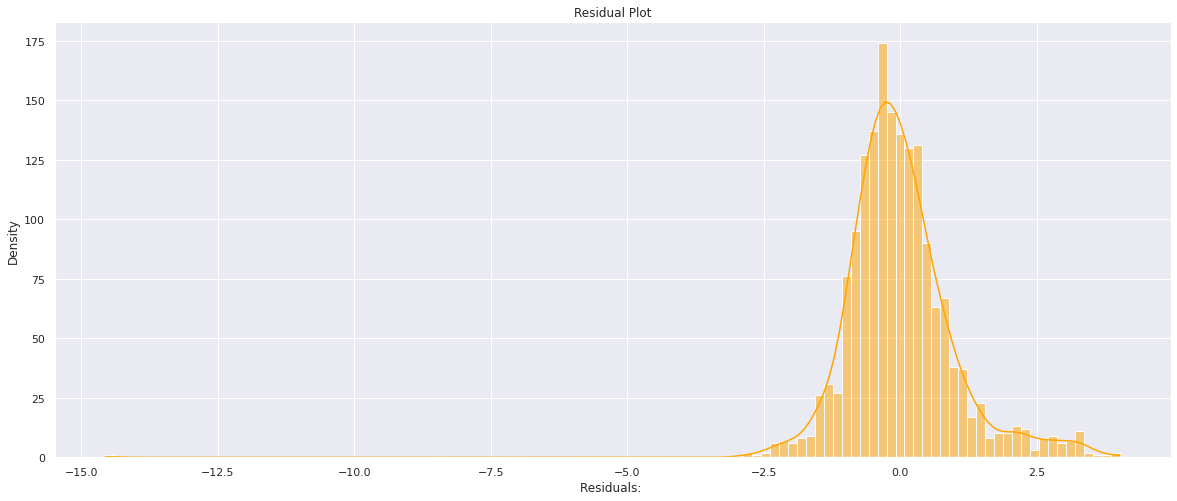

In [ ]:
import statsmodels.api as sm
model=sm.OLS(ytrain,xtrain).fit()
influence = model.get_influence()

#obtain standardized residuals
residuals = influence.resid_studentized_internal
sns.set(rc = {'figure.figsize':(20,8)})
#display standardized residuals
#print(residuals)
sns.histplot(residuals, kde=True, color="Orange")
plt.title('Residual Plot')
plt.xlabel('Residuals: ')
plt.ylabel('Density')

Residuals


In [ ]:
#sns.histplot(residuals,kde=True,color="Orange")
residuals.mean() #close to zero. Normal dist.


-6.145660568501904e-05